### Home Credit Default Risk
*Predict how capable each applicant is of repaying a loan...*

**application_train.csv:** Static data for all application. One row represents one loan in our data sample.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection

In [2]:
# Import the dataset into a pandas dataframe
data = pd.read_csv("./home-credit-default-risk/application_train.csv")

In [3]:
# Display that first 5 rows of the DataFrame
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Show target column distribution
data['TARGET'].value_counts(normalize = "true")

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

We can see that there is a severe difference in the target column. Across clients in the training data, **92%** ***do not*** have payment difficulties, while only **8%** ***do*** have payment difficulties. This imbalance can greatly influence the models' training ability. Might want to consider different sampling operations to reduce overfitting and improve precision.

#### Column Descriptions
**TARGET:** (1 - client with payment difficulties, 0 - client without payment difficulties)
- FLAG_DOCUMENT_(N): Did client provide document N?
- AMT_REQ_CREDIT_BUREAU_(time frame): Number of enquiries to Credit Bureau about the client one time frame (hour, day, week, etc.) before application.

float64: 65
int64: 41
object: 16

In [5]:
# Summary of the DataFrame, data types, non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Provides statistical summary of numerical columns (count, mean, sd, min, max, etc.)
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Data Preprocessing
Requirements:
- Encode categorical data with ordinal encoder
- All entries normalized with the standard scaler to remove the mean and scale to unit variance
- Missing values filled with the mean value of that feature
- Split test set into different subsets by the values of the protected feature; **the classification prediction accuracies on these subsets need to be calculated?**
- Choose the clients' gender as a protected (sensitive) variable; the test set needs to be split into two groups: male and female samples

In [7]:
# Display categorical, ordinal, and flag features that need encoding
data.select_dtypes(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [8]:
# Convert string "NaNs" to np.nan
data.replace(["NaN", "nan", "", "null", "NULL", "Missing", "missing"], np.nan, inplace=True)

# Drop column - irrelevance
data = data.drop(["EMERGENCYSTATE_MODE"], axis=1)

# Map flag variables to binary for simplicity
data["FLAG_OWN_CAR"] = data["FLAG_OWN_CAR"].map({"Y": 1, "N": 0})
data["FLAG_OWN_REALTY"] = data["FLAG_OWN_REALTY"].map({"Y": 1, "N": 0})

# Display categorical, ordinal, and flag features that need encoding
data.select_dtypes(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick"
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick"
307507,Cash loans,F,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick"
307508,Cash loans,F,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel
307509,Cash loans,F,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick"


In [9]:
# Display ordinal columns for education type and family status
print(data["NAME_EDUCATION_TYPE"].value_counts())
print('\n', data["NAME_FAMILY_STATUS"].value_counts())

# Ordered categories for ordinal encoder
family_status_categories = [
    ["Single / not married", "Civil marriage", "Married", "Separated", "Widow", "Unknown"]
]
education_type_categories = [
    ["Lower secondary", "Secondary / secondary special", "Incomplete higher", "Higher education", "Academic degree"]
]

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

 NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# One hot encoded columns (no heirarchy exists between categorical types)
categorical_columns = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_TYPE_SUITE", 
                       "NAME_INCOME_TYPE", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
                       "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE",
                       "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
                       "WALLSMATERIAL_MODE"]

# Numerical columns
numerical_columns = data.drop(["TARGET"], axis=1).select_dtypes(include=["int64", "float64"]).columns

# Ordinal columns where hierarchy could be inferred
family_status_encoder = OrdinalEncoder(categories=family_status_categories)
education_type_encoder = OrdinalEncoder(categories=education_type_categories)

# Categorical preprocessor uses one hot encoding
categorical_preprocessor = Pipeline(
    steps=[
        (
        "imputation_constant",
        SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Numerical preprocessor imputes missing values with the mean & employs standard scaler
numerical_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_columns),
        ("numerical", numerical_preprocessor, numerical_columns),
        ("family_ordinal", family_status_encoder, ["NAME_FAMILY_STATUS"]),
        ("education_ordinal", education_type_encoder, ["NAME_EDUCATION_TYPE"]),
    ]
)

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=42)

X_train = train.drop("TARGET", axis=1)
y_train = train["TARGET"]

# Combined test set
X_test = test.drop("TARGET", axis=1)
y_test = test["TARGET"]

# Split test set by sex M
test_male = test[test["CODE_GENDER"] == "M"]
X_test_male = test_male.drop("TARGET", axis=1)
y_test_male = test_male["TARGET"]

# Split test set by sex F
test_female = test[test["CODE_GENDER"] == "F"]
X_test_female = test_female.drop("TARGET", axis=1)
y_test_female = test_female["TARGET"]

print("Joint Data")
print(test["CODE_GENDER"].value_counts())
print("\nMale Data")
print(test_male["CODE_GENDER"].value_counts())
print("\nFemale Data")
print(test_female["CODE_GENDER"].value_counts())


Joint Data
CODE_GENDER
F      50790
M      26087
XNA        1
Name: count, dtype: int64

Male Data
CODE_GENDER
M    26087
Name: count, dtype: int64

Female Data
CODE_GENDER
F    50790
Name: count, dtype: int64


#### Create a Decision Tree and Neural Network Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Create a decision tree classifier pipeline
decision_tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42)),
])

# Create NN classifier pipeline
nn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000, random_state=42)),
])

# Fit the decision tree classifier to the training data
decision_tree_pipeline.fit(X_train, y_train)

# Fit the neural network classifier to the training data
nn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APP...
                                                                              'marriage',
                                                                              'Married',
                                                                              'Separated',
                                                                              'Widow',
                                                                              'Unknown']]),
                                                  ['NAME_FAMILY_STATUS']),
                                                 ('education_ordinal',
                                                  OrdinalEncoder(categories=[['Lower '
                                                                              'secondary',
                                                                              'Secondary '
                                                                              '/ '
                                                                              'secondary '
                                                                              'special',
                                                                              'Incomplete '
                                                                              'higher',
                                                                              'Higher '
                                                                              'education',
                                                                              'Academic '
                                                                              'degree']]),
                                                  ['NAME_EDUCATION_TYPE'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000,
                               random_state=42))])

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42)),
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APP...
                                                                              'not '
                                                                              'married',
                                                                              'Civil '
                                                                              'marriage',
                                                                              'Married',
                                                                              'Separated',
                                                                              'Widow',
                                                                              'Unknown']]),
                                                  ['NAME_FAMILY_STATUS']),
                                                 ('education_ordinal',
                                                  OrdinalEncoder(categories=[['Lower '
                                                                              'secondary',
                                                                              'Secondary '
                                                                              '/ '
                                                                              'secondary '
                                                                              'special',
                                                                              'Incomplete '
                                                                              'higher',
                                                                              'Higher '
                                                                              'education',
                                                                              'Academic '
                                                                              'degree']]),
                                                  ['NAME_EDUCATION_TYPE'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [60]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feature_imp['Feature'][:30][::-1], feature_imp['Importance'][:30][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 30 Features - LGBM")
plt.tight_layout()
plt.show()


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: NAME_CONTRACT_TYPE: object, CODE_GENDER: object, NAME_TYPE_SUITE: object, NAME_INCOME_TYPE: object, NAME_EDUCATION_TYPE: object, NAME_FAMILY_STATUS: object, NAME_HOUSING_TYPE: object, OCCUPATION_TYPE: object, WEEKDAY_APPR_PROCESS_START: object, ORGANIZATION_TYPE: object, FONDKAPREMONT_MODE: object, HOUSETYPE_MODE: object, WALLSMATERIAL_MODE: object

#### Evaluate Accuracy on the Test Set

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Add male & female test sets to a dictionary
split_test_sets = {
    'Combined': [X_test, y_test],
    'Male': [X_test_male, y_test_male],
    'Female': [X_test_female, y_test_female]
}
# Add models to a dictionary
models = {
    'Decision Tree': decision_tree_pipeline,
    'Neural Network': nn_pipeline,
    'Random Forest': rf_pipeline
}

accuracy_results = {
    'Combined': [],
    'Male': [],
    'Female': []
}

precision_results = {
    'Combined': [],
    'Male': [],
    'Female': []
}

recall_results = {
    'Combined': [],
    'Male': [],
    'Female': []
}
# Evaluate each test set on each model
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n{name} Classifier")
    for i, (sex, test) in enumerate(split_test_sets.items(), 1):
        print(f"\nEvaluating {name} on {sex} test set.")
        y_pred = model.predict(test[0])
        accuracy_results[sex].append(accuracy_score(test[1], y_pred) * 100)
        precision_results[sex].append(precision_score(test[1], y_pred) * 100)
        recall_results[sex].append(recall_score(test[1], y_pred) * 100)
        print("Accuracy: ", accuracy_score(test[1], y_pred))
        print("Precision: ", precision_score(test[1], y_pred))
        print("Recall: ", recall_score(test[1], y_pred))
        print("F1-Score: ", f1_score(test[1], y_pred))



Decision Tree Classifier

Evaluating Decision Tree on Combined test set.
Accuracy:  0.8526886755638804
Precision:  0.14047619047619048
Recall:  0.16200936843805525
F1-Score:  0.1504763333583377

Evaluating Decision Tree on Male test set.
Accuracy:  0.8235136274772875
Precision:  0.1647863247863248
Recall:  0.182368520620507
F1-Score:  0.17313218390804597

Evaluating Decision Tree on Female test set.
Accuracy:  0.8676708013388462
Precision:  0.1236061684460261
Recall:  0.14684329199549043
F1-Score:  0.1342264588432307

Neural Network Classifier

Evaluating Neural Network on Combined test set.
Accuracy:  0.9112489919092588
Precision:  0.2676470588235294
Recall:  0.05879502503634308
F1-Score:  0.096411071381274

Evaluating Neural Network on Male test set.
Accuracy:  0.8873385211024648
Precision:  0.28735632183908044
Recall:  0.07567158531971245
F1-Score:  0.11979634621144056

Evaluating Neural Network on Female test set.
Accuracy:  0.923528253593227
Precision:  0.2469879518072289
Recall:

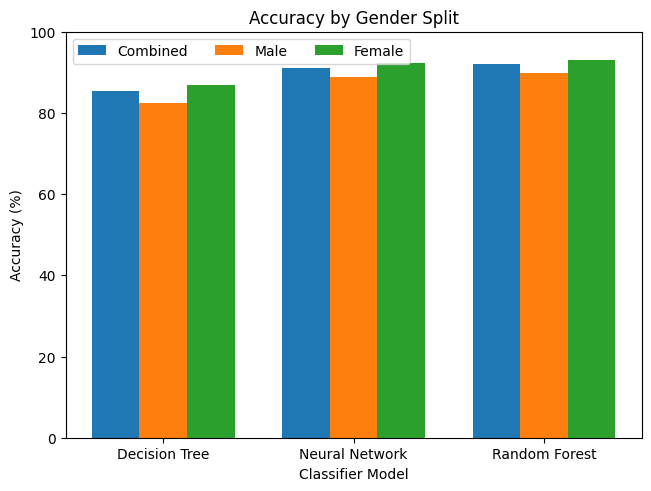

In [35]:
# Create bar chart to show accuracy across gender subsets
labels = list(models.keys())

x = np.arange(len(labels))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracy_results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Type of Classifier")
ax.set_title("Accuracy by Gender Subset")
ax.set_xticks(x + width, labels)
ax.legend(loc="upper left", ncols=3)
ax.set_ylim(0, 100)

plt.show()

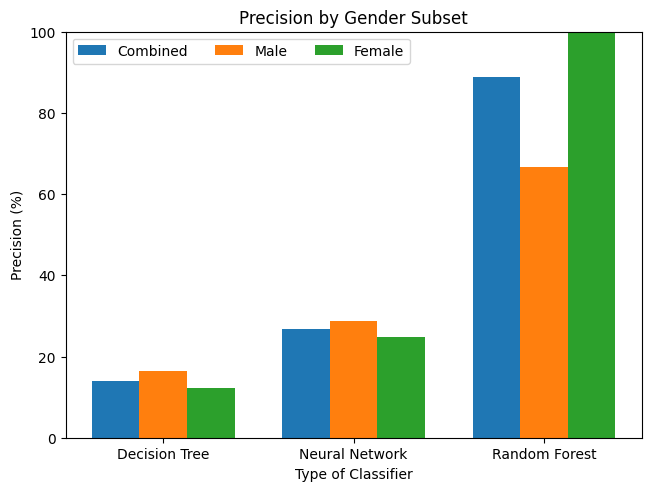

In [42]:
# Create bar chart to show precision across gender subsets
labels = list(models.keys())

x = np.arange(len(labels))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in precision_results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel("Precision (%)")
ax.set_xlabel("Type of Classifier")
ax.set_title("Precision by Gender Subset")
ax.set_xticks(x + width, labels)
ax.legend(loc="upper left", ncols=3)
ax.set_ylim(0, 100)

plt.show()

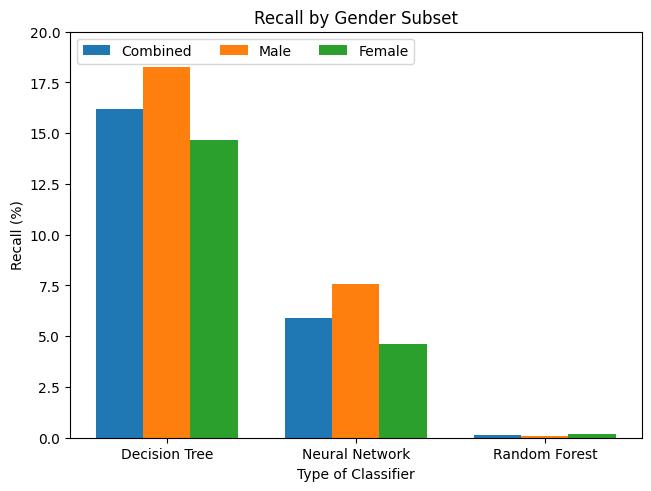

In [46]:
# Create bar chart to show recall across gender subsets
labels = list(models.keys())

x = np.arange(len(labels))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel("Recall (%)")
ax.set_xlabel("Type of Classifier")
ax.set_title("Recall by Gender Subset")
ax.set_xticks(x + width, labels)
ax.legend(loc="upper left", ncols=3)
ax.set_ylim(0, 20)

plt.show()